In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn


n_majority = 100000

# The desired mean values of the sample.
mu = np.array([5,5,5,5,5,5])

# The desired covariance matrix.
r = np.array([
        [1,0,-0.07,0.31,-0.069,0.65],
[0,1,0,0,0.258,0.1],
[-0.07,0,1,0.71,0.012,0.16],
[0.31,0,0.71,1,0.17,0.58],
[-0.069,0.258,0.012,0.17,1,0.22],
[0.65,0.1,0.16,0.58,0.22,1]
    ])

# Generate the random samples.
rng = np.random.default_rng()
y = rng.multivariate_normal(mu, r, size=n_majority)


In [2]:
dataset = pd.DataFrame(y)
dataset['group'] = 0

In [3]:
dataset.describe()

,0,1,2,3,4,5,group
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0
mean,4.998461,4.998134,5.004702,5.005047,5.000693,5.001407,0.0
std,1.000370,0.997988,1.001099,0.997460,1.002081,1.001233,0.0
min,0.685982,-0.037339,0.988423,0.112345,0.740917,0.613245,0.0
25%,4.324059,4.323855,4.328803,4.332102,4.327010,4.320370,0.0
50%,4.996694,4.999125,5.004751,5.005045,5.000073,5.003161,0.0
75%,5.668244,5.667871,5.681632,5.676188,5.679011,5.674732,0.0
max,9.054768,9.441877,8.876154,9.624112,9.359495,9.428872,0.0


In [4]:
dataset.corr()

,0,1,2,3,4,5,group
0,1.000000,-0.001681,-0.074892,0.305840,-0.065151,0.650400,NaN
1,-0.001681,1.000000,0.003407,0.003140,0.261593,0.103036,NaN
2,-0.074892,0.003407,1.000000,0.707577,0.011453,0.155910,NaN
3,0.305840,0.003140,0.707577,1.000000,0.173925,0.577731,NaN
4,-0.065151,0.261593,0.011453,0.173925,1.000000,0.222004,NaN
5,0.650400,0.103036,0.155910,0.577731,0.222004,1.000000,NaN
group,NaN,NaN,NaN,NaN,NaN,NaN,NaN


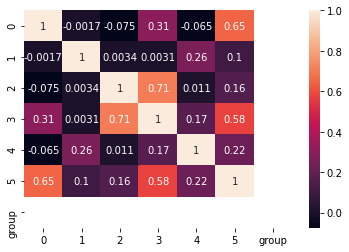

In [5]:
corrMatrix = dataset.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()


In [6]:
#effect sizes between black and white
d = [0.72,0,0,0.31,0,0]
minority_proportion = .135
minority_n = round((n_majority*minority_proportion)/(1-minority_proportion))
minority_means = mu - d

In [7]:
minority_means = mu - d

In [8]:
rng = np.random.default_rng()
y = rng.multivariate_normal(minority_means, r, size=minority_n)

In [9]:
minority = pd.DataFrame(y)
minority['group'] = 1

In [10]:
minority.describe()

,0,1,2,3,4,5,group
count,15607.000000,15607.000000,15607.000000,15607.000000,15607.000000,15607.000000,15607.0
mean,4.286326,4.996990,4.995048,4.688973,5.001199,5.007083,1.0
std,0.998267,0.996530,1.000408,0.994935,0.995140,1.001324,0.0
min,0.276251,1.326646,1.157869,0.883367,1.490109,1.333630,1.0
25%,3.605407,4.331819,4.323497,4.025546,4.327694,4.328120,1.0
50%,4.283886,4.995370,4.991167,4.688563,5.002784,5.005306,1.0
75%,4.954805,5.665915,5.667610,5.364817,5.670107,5.697340,1.0
max,8.105559,8.666687,10.087436,8.947675,9.075540,8.944420,1.0


In [11]:
data = minority.append(dataset)

In [12]:
data.describe()

,0,1,2,3,4,5,group
count,115607.000000,115607.000000,115607.000000,115607.000000,115607.000000,115607.000000,115607.000000
mean,4.902323,4.997980,5.003399,4.962377,5.000761,5.002173,0.135000
std,1.029264,0.997787,1.001007,1.002948,1.001143,1.001243,0.341726
min,0.276251,-0.037339,0.988423,0.112345,0.740917,0.613245,0.000000
25%,4.212976,4.325026,4.328268,4.284425,4.327058,4.321667,0.000000
50%,4.903694,4.998804,5.002901,4.962227,5.000361,5.003553,0.000000
75%,5.597001,5.667673,5.679779,5.637441,5.677991,5.677802,0.000000
max,9.054768,9.441877,10.087436,9.624112,9.359495,9.428872,1.000000


In [13]:
data = data.rename(columns={0:'Cognitive Ability',1:'Education',2:'Experience',3:'Structured Interview',4:'Conscientiousness',5:'Performance'})

In [14]:
from pathlib import Path  
filepath = Path('sim_AI_dataset.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
data.to_csv(filepath)  

In [15]:
data

,Cognitive Ability,Education,Experience,Structured Interview,Conscientiousness,Performance,group
0,3.483180,5.879688,5.522622,5.035493,6.327363,4.425741,1
1,4.691847,4.057143,5.979742,5.317974,5.166555,5.522998,1
2,4.702305,4.152752,5.971321,5.942924,4.780420,5.486352,1
3,6.046044,5.745921,5.155982,5.752150,6.197850,8.199577,1
4,4.409363,7.089909,4.308662,4.913904,6.024283,5.585866,1
...,...,...,...,...,...,...,...
99995,5.232694,5.032550,5.624710,6.526394,6.628116,5.628392,0
99996,5.027477,4.372187,5.245060,5.971789,4.887126,5.230308,0
99997,4.961658,4.873640,4.571249,4.747349,6.396430,5.551024,0
99998,5.777142,4.791477,6.514750,6.328390,4.412085,6.168031,0
